$$
\newcommand{\mat}[1]{\pmb {#1}}
\newcommand{\mattr}[1]{\pmb {#1}^\top}
\newcommand{\matinv}[1]{\pmb {#1}^{-1}}
\newcommand{\vec}[1]{\pmb {#1}}
\newcommand{\vectr}[1]{\pmb {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\pmb{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
$$
# CS236605: Deep Learning
# Tutorial 2: Logistic Regression

## Introduction

TODO

In this tutorial, we will cover:

* foo
* bar

In [3]:
# Setup
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20

## Theory Reminders

### The supervised learning context

We have a labeled dataset of $N$ labelled samples: $\mathcal{D} = \{ (\vec{x}^i,y^i) \}_{i=1}^N$, where
- $\vec{x}^i = \left(x^i_1, \dots, x^i_D\right) \in \mathcal{X}$  is a **sample** or **feature vector**.
- $y^i \in \mathcal{Y}$ is the **label**.
- For classification to one of $C$ classes, $\mathcal{Y} = \{0,\dots,C-1\}$, so each $y^i$ is a **class label**.
- Usually we assume each labeled sample $(\vec{x}^i,y^i)$
  is drawn from a joint distribution
  $$P(\rvec{X}, \rvar{Y})=P(\rvec{X})\cdot P(\rvar{Y}|\rvec{X})$$

- Our **model** is a parametrized set of functions $\mathcal{H}$.

    For example,
    $$
    \mathcal{H} =
    \left\{ h: \mathcal{X}\rightarrow\mathcal{Y}
    ~\vert~
    h(\vec{x}) = \varphi(\vectr{w}\vec{x}+b); \vec{w}\in\set{R}^D,~b\in\set{R}\right\}
    $$
    where $\varphi(\cdot)$ is some nonlinear function, is known as the **perceptron** model.
    
    The model is **trained** by updating it's parameters to improve it's performance on some data.
    
    A model may also have **hyperparameters** which are not trained (but they can be cross-validated).
    For example, the choice of $\varphi(\cdot)$ above could be a hyperparameter.

- We define an empirical **loss function** $L_{\mathcal{D}}(h)$ as the measure of how well a function $h\in\mathcal{H}$ fits the data $\mathcal{D}$, for example
$$
L_{\mathcal{D}}(h) = \frac{1}{N} \sum_{i=1}^{N} \ell(h(\vec{x}^i), y^i) + R(h)
$$
where
    - $\ell(y,\hat{y})$ is some **pointwise loss**, e.g. MSE for regression or cross-entropy for classification (depends on on the data).
    - $R(h)$ is a regularization term (depends only on the model).

- We wish to find a parametrization of our model $h^{\ast}\in\mathcal{H}$ such that
$$
h^{\ast} = \arg\min_{h\in\mathcal{H}} L_{\mathcal{D}}(h)
$$

### Linear Regression

We're trying to learn a continuous and perhaps non-deterministic function $y=f(\vec{x})$.

- Domain: $\vec{x}^i \in \set{R}^D$
- Target: $y^i \in \set{R}$ (can of course be extended to the vector-valued case)
- Model: $\hat y = h(\vec{x}) = \vectr{w}\vec{x} + b$
- MSE loss:
    $$\begin{align}
    \ell(y,\hat{y}) &= (y-\hat{y})^2 \\
    L_{\mathcal{D}}(h) &= \frac{1}{N}\sum_{i=1}^{N}(h(\vec{x}^i)-y^i)^2 =
        \frac{1}{N}\sum_{i=1}^{N}(\vectr{w}\vec{x} + b -y^i)^2 \\
    \end{align}$$

- Closed-form solution exists!
    $$
    \vec{w}^{\ast} = (\mat{X}\mattr{X})^{-1}\mat{X}\vec{y},
    $$
    where $\mat{X}$ is a matrix with all the samples in its columns (after bias trick),
    and $\vec{y}$ is a vector of all the labels.

### Binary Logistic Regression

Actually a **classification** model. We're trying to classify data into 2 classes.

- Domain: $\vec{x}^i \in \set{R}^D$
- Target: $y^i \in \{0,1\}$
- Model: $\hat{y} = h(\vec{x}) = \sigma(\vectr{w}\vec{x}+b)$, where $\sigma(\vec{z})$ is the **logistic function**.
    - Probabilistic interpretation
- Cross-entropy loss:
    $$\begin{align}
    \ell(y, \hat{y}) &=  - y \log(\hat{y}) - (1-y) \log(1-\hat{y}) \\
    \end{align}$$
- No closed form solution, but loss is **convex**!

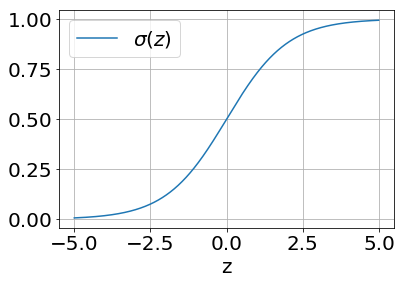

In [4]:
# Plot the logistic function
def logistic(z):
    return 1 / (1.0 + np.exp(-z))
    
x = np.arange(-5, 5, .01)    
plt.plot(x, logistic(x), label='$\sigma(z)$')
plt.grid(True); plt.xlabel('z'); plt.legend();